In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
df = pd.read_csv('data\insurance.csv')

In [6]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
X = df.drop(['index','charges','region'], axis=1)

In [8]:
X.head()

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no


In [9]:
y = df['charges']

In [10]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [11]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
cat_encoder = OneHotEncoder()

In [12]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",cat_encoder, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]

)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X[0:5]

array([[ 1.        ,  0.        ,  0.        ,  1.        , -1.43876426,
        -0.45332   , -0.90861367],
       [ 0.        ,  1.        ,  1.        ,  0.        , -1.50996545,
         0.5096211 , -0.07876719],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.79795355,
         0.38330685,  1.58092576],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.4419476 ,
        -1.30553108, -0.90861367],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.51314879,
        -0.29255641, -0.90861367]])

#### Create an Evaluate Function to give all metrics after model Training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 7), (268, 7))

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6127.9431
- Mean Absolute Error: 4150.8704
- R2 Score: 0.7398
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5829.0658
- Mean Absolute Error: 4143.3137
- R2 Score: 0.7811


Lasso
Model performance for Training set
- Root Mean Squared Error: 6113.0677
- Mean Absolute Error: 4210.8571
- R2 Score: 0.7411
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5829.4476
- Mean Absolute Error: 4213.9805
- R2 Score: 0.7811


Ridge
Model performance for Training set
- Root Mean Squared Error: 6113.1297
- Mean Absolute Error: 4215.0186
- R2 Score: 0.7411
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5830.8301
- Mean Absolute Error: 4219.1957
- R2 Score: 0.7810


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4354.3166
- Mean Absolute Error: 2518.0053


### Results

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
7,CatBoosting Regressor,0.867321
5,Random Forest Regressor,0.860428
6,XGBRegressor,0.844057
8,AdaBoost Regressor,0.822087
3,K-Neighbors Regressor,0.800345
0,Linear Regression,0.781138
1,Lasso,0.781110
2,Ridge,0.781006
4,Decision Tree,0.745047


#### CatBoosting Regressor

In [19]:
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train, early_stopping_rounds=50, verbose=100)

predictions = catboost_model.predict(X_test)

Learning rate set to 0.041383
0:	learn: 11640.6487315	total: 1.17ms	remaining: 1.17s
100:	learn: 4297.9336097	total: 86.2ms	remaining: 767ms
200:	learn: 4027.1634135	total: 181ms	remaining: 719ms
300:	learn: 3854.1833035	total: 274ms	remaining: 636ms
400:	learn: 3661.4292651	total: 366ms	remaining: 547ms
500:	learn: 3501.2068344	total: 458ms	remaining: 456ms
600:	learn: 3375.8901533	total: 553ms	remaining: 367ms
700:	learn: 3238.5848120	total: 648ms	remaining: 276ms
800:	learn: 3120.9086617	total: 743ms	remaining: 185ms
900:	learn: 3009.2042656	total: 840ms	remaining: 92.3ms
999:	learn: 2911.9737398	total: 937ms	remaining: 0us


In [20]:
rmse = np.sqrt(mean_squared_error(y_test, predictions)) 
r2 = r2_score(y_test, predictions)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

Root Mean Squared Error: 4538.536320164575
R-squared Score: 0.8673205782003798


#### Plot y_pred and y_test

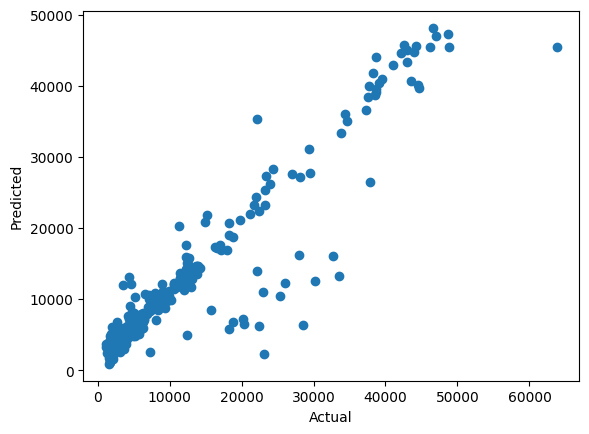

In [21]:
plt.scatter(y_test,predictions);
plt.xlabel('Actual');
plt.ylabel('Predicted');

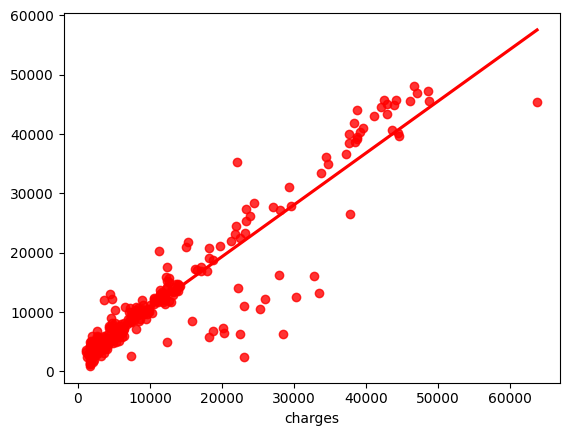

In [23]:
sns.regplot(x=y_test,y=predictions,ci=None,color ='red');

In [49]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': predictions, 'Difference': y_test-predictions})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.06825,11143.059695,-2047.991445
887,5272.17580,6689.970583,-1417.794783
890,29330.98315,31129.864440,-1798.881290
1293,9301.89355,10071.315100,-769.421550
259,33750.29180,33359.416252,390.875548
...,...,...,...
109,47055.53210,46993.808929,61.723171
575,12222.89830,13849.131434,-1626.233134
535,6067.12675,5760.431965,306.694785
543,63770.42801,45441.734341,18328.693669
